In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sampleNo = 5;

In [2]:
s0 = np.array([[-2.25848649,  3.35251005],
 [-2.99297047,  0.33290089],
 [-1.43818701,  1.69365499],
 [-3.05914958, -0.3380505 ],
 [-2.12484234,  2.14868541],
 [-0.21047972,  2.30394458],
 [-3.60356125,  6.22808921],
 [-0.5165278 ,  1.90740988],
 [-1.54887737,  1.63762592]])

s1 =np.array([[ 2.41281153, -1.02083945],
 [ 3.87626612, -4.10840219],
 [ 3.1748448,   1.05400623],
 [ 2.27211665, -7.10902038],
 [ 4.30090963,  0.66675487],
 [ 2.64311209,  4.82250906],
 [ 1.19556516, -6.17784991],
 [ 4.20209102, -1.14324642],
 [ 1.54714445, -2.68912864]])

In [4]:
from pandas import DataFrame
if s0.shape[1] == 2:
    s0 = np.insert(s0, 2, values=1, axis=1) # Add a column of tag values
if s1.shape[1] == 2:
    s1 = np.insert(s1, 2, values=0, axis=1) # Add a column of tag values
s = np.concatenate((s0,s1),axis=0) # concatenate the two groups
df = DataFrame(s, columns=['x1','x2','y'])
df

,x1,x2,y
0,-2.258486,3.352510,1.0
1,-2.992970,0.332901,1.0
2,-1.438187,1.693655,1.0
3,-3.059150,-0.338050,1.0
4,-2.124842,2.148685,1.0
5,-0.210480,2.303945,1.0
6,-3.603561,6.228089,1.0
7,-0.516528,1.907410,1.0
8,-1.548877,1.637626,1.0
9,2.412812,-1.020839,0.0


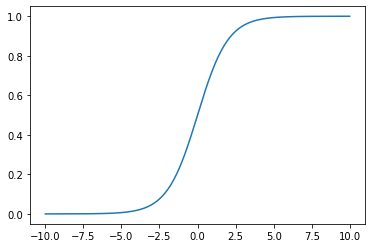

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
x = np.arange(-10,10,0.01) 
plt.plot(x,sigmoid(x)) 
plt.show()

In [6]:
w1 = -2
w2 = 1
b = 0
loss = 100000
epoch = 30
c = 0.001
while True:
    if(epoch%20==0):
        print("epoch:", epoch)
        print("w1:%.2f, w2:%.2f"%(w1,w2))
    lastloss = loss
    loss = 0
    partialw1 = 0
    partialw2 = 0
    for k in range(2*sampleNo):
        yhat = sigmoid(w1*s[k,0]+w2*s[k,1]+b)
        y = s[k,2]
        loss += (yhat-y)*(yhat-y)
        partialw1 += 2*(yhat-y)*yhat*(1-yhat)*s[k,0]
        partialw2 += 2*(yhat-y)*yhat*(1-yhat)*s[k,1]
    if(epoch%100==0):
        print("loss:", loss)
    if(lastloss<loss):
        break
    w1 = w1 - 0.1 * partialw1
    w2 = w2 - 0.1 * partialw2
    epoch = epoch+1
    if(epoch>1000):
        break
    if(loss<0.1):
        break
    if(lastloss - loss < c):
        break
print("epoch:", epoch)
print("w1:%.2f, w2:%.2f"%(w1,w2))
print("loss:", loss)

epoch: 31
w1:-2.00, w2:1.00
loss: 0.006508373476459802


In [16]:
w1 = -2
w2 = 1
b = 1
loss = 500000
epoch = 0
c = 0.01
while True:
    if(epoch%100==0):
        print("epoch:", epoch)
        print("w1:%.2f, w2:%.2f"%(w1,w2))
    lastloss = loss
    loss = 0
    partialw1 = 0
    partialw2 = 0
    
    for k in range(2*sampleNo):
        yhat = sigmoid(w1*s[k,0]+w2*s[k,1]+b)
        y = s[k,2]
        loss += (yhat-y)*(yhat-y)
        partialw1 += 2*(yhat-y)*yhat*(1-yhat)*s[k,0]
        partialw2 += 2*(yhat-y)*yhat*(1-yhat)*s[k,1]
    if(epoch%100==0):
        print("loss:", loss)
    if(lastloss<loss):
        break
    w1 = w1 - 0.1 * partialw1
    w2 = w2 - 0.1 * partialw2
    epoch = epoch+1
    
    if(lastloss - loss < c):
        break
print("epoch:", epoch)
print("w1:%.2f, w2:%.2f"%(w1,w2))
print("loss:", loss)

epoch: 0
w1:-2.00, w2:1.00
loss: 0.0010057479412610207
epoch: 2
w1:-2.00, w2:1.00
loss: 0.0010040046751782095


In [47]:
w1 = -2
w2 = -1
b = 1
loss = 500000
epoch = 0
c = 0.01
while True:
    if(epoch%100==0):
        print("epoch:", epoch)
        print("w1:%.2f, w2:%.2f"%(w1,w2))
    lastloss = loss
    loss = 0
    partialw1 = 0
    partialw2 = 0
    
    for k in range(2*sampleNo):
        yhat = sigmoid(w1*s[k,0]+w2*s[k,1]+b)
        y = s[k,2]
        print("yhat:%.2f"%(yhat))
        loss += (yhat-y)*(yhat-y)
        partialw1 += 2*(yhat-y)*yhat*(1-yhat)*s[k,0]
        partialw2 += 2*(yhat-y)*yhat*(1-yhat)*s[k,1]
    if(epoch%100==0):
        print("loss:", loss)
    if(lastloss<loss):
        break
    w1 = w1 - 0.1 * partialw1
    w2 = w2 - 0.1 * partialw2
    epoch = epoch+1
    if(epoch>1000):
        break
    if(loss<0.1):
        break
    if(lastloss - loss < c):
        break
print("epoch:", epoch)
print("w1:%.2f, w2:%.2f"%(w1,w2))
print("loss:", loss)

epoch: 0
w1:-2.00, w2:-1.00
yhat:0.90
yhat:1.00
yhat:0.90
yhat:1.00
yhat:0.96
yhat:0.29
yhat:0.88
yhat:0.53
yhat:0.92
yhat:0.06
loss: 0.7670070010979774
yhat:0.94
yhat:1.00
yhat:0.92
yhat:1.00
yhat:0.97
yhat:0.37
yhat:0.95
yhat:0.60
yhat:0.94
yhat:0.05
yhat:0.96
yhat:1.00
yhat:0.94
yhat:1.00
yhat:0.98
yhat:0.43
yhat:0.98
yhat:0.66
yhat:0.95
yhat:0.04
yhat:0.97
yhat:1.00
yhat:0.95
yhat:1.00
yhat:0.98
yhat:0.49
yhat:0.99
yhat:0.70
yhat:0.96
yhat:0.03
yhat:0.98
yhat:1.00
yhat:0.96
yhat:1.00
yhat:0.99
yhat:0.54
yhat:0.99
yhat:0.73
yhat:0.97
yhat:0.03
yhat:0.98
yhat:1.00
yhat:0.96
yhat:1.00
yhat:0.99
yhat:0.58
yhat:1.00
yhat:0.76
yhat:0.97
yhat:0.03
yhat:0.99
yhat:1.00
yhat:0.97
yhat:1.00
yhat:0.99
yhat:0.62
yhat:1.00
yhat:0.78
yhat:0.97
yhat:0.02
yhat:0.99
yhat:1.00
yhat:0.97
yhat:1.00
yhat:0.99
yhat:0.65
yhat:1.00
yhat:0.80
yhat:0.98
yhat:0.02
yhat:0.99
yhat:1.00
yhat:0.97
yhat:1.00
yhat:0.99
yhat:0.67
yhat:1.00
yhat:0.82
yhat:0.98
yhat:0.02
yhat:0.99
yhat:1.00
yhat:0.97
yhat:1.00
yhat:0.

In [46]:
w1 = -2
w2 = 1
b = 0
loss = 500000
epoch = 0
c = 0.0001
while True:
    if(epoch%20==0):
        print("epoch:", epoch)
        print("w1:%.2f, w2:%.2f"%(w1,w2))
    lastloss = loss
    loss = 0
    partialw1 = 0
    partialw2 = 0
    
    k = 10
    yhat = sigmoid(w1*s[k,0]+w2*s[k,1]+b)
    y = s[k,2]
    print("yhat:%.2f"%(yhat))
    loss += (yhat-y)*(yhat-y)
    partialw1 += 2*(yhat-y)*yhat*(1-yhat)*s[k,0]
    partialw2 += 2*(yhat-y)*yhat*(1-yhat)*s[k,1]
    print("partialw1:%.2f, partialw2:%.2f"%(partialw1,partialw2))
    if(epoch%20==0):
        print("loss:", loss)
    if(lastloss<loss):
        break
    w1 = w1 - 0.1 * partialw1
    w2 = w2 - 0.1 * partialw2
    epoch = epoch+1
    if(epoch>500):
        break
    if(loss<0.1):
        break
   
    print("epoch:", epoch)
print("w1:%.2f, w2:%.2f"%(w1,w2))
print("loss:", loss)

epoch: 0
w1:-2.00, w2:1.00
yhat:0.00
partialw1:0.00, partialw2:-0.00
loss: 4.985596429709418e-11
w1:-2.00, w2:1.00
loss: 4.985596429709418e-11


In [44]:
w1 = -2
w2 = 1
b = 0
loss = 500000
epoch = 0
c = 0.0001
while True:
    if(epoch%20==0):
        print("epoch:", epoch)
        print("w1:%.2f, w2:%.2f"%(w1,w2))
    lastloss = loss
    loss = 0
    partialw1 = 0
    partialw2 = 0
    
    k = 5
    yhat = sigmoid(w1*s[k,0]+w2*s[k,1]+b)
    y = s[k,2]
    print("yhat:%.2f"%(yhat))
    loss += (yhat-y)*(yhat-y)
    partialw1 += 2*(yhat-y)*yhat*(1-yhat)*s[k,0]
    partialw2 += 2*(yhat-y)*yhat*(1-yhat)*s[k,1]
    print("partialw1:%.2f, partialw2:%.2f"%(partialw1,partialw2))
    
    w1 = w1 - 0.1 * partialw1
    w2 = w2 - 0.1 * partialw2
    epoch = epoch+1
    if(epoch>1000):
        break
   
    print("epoch:", epoch)
print("w1:%.2f, w2:%.2f"%(w1,w2))
print("loss:", loss)

epoch: 0
w1:-2.00, w2:1.00
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 1
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 2
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 3
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 4
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 5
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 6
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 7
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 8
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 9
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 10
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 11
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 12
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 13
yhat:0.94
partialw1:0.00, partialw2:-0.02
epoch: 14
yhat:0.94
partialw1:0.00, partialw2:-0.01
epoch: 15
yhat:0.94
partialw1:0.00, partialw2:-0.01
epoch: 16
yhat:0.94
partialw1:0.00, partialw2:-0.01
epoch: 17
yhat:0.94
partialw1:0.00, partialw2:-0.01
epoch: 18
yhat:0.94
partialw1:0.00, partialw2:-0.01
epoc

epoch: 458
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 459
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 460
epoch: 460
w1:-2.03, w2:1.34
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 461
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 462
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 463
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 464
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 465
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 466
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 467
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 468
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 469
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 470
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 471
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 472
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 473
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 474
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 475
yhat:0.97
partialw1:0.00, partialw2:-0.00
epoch: 476
yhat:0

epoch: 940
w1:-2.04, w2:1.47
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 941
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 942
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 943
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 944
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 945
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 946
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 947
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 948
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 949
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 950
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 951
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 952
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 953
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 954
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 955
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 956
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 957
yhat:0.98
partialw1:0.00, partialw2:-0.00
epoch: 958
yhat:0.98
partial

My analyse here is that  when I change k or the others parameters the partialw1 is always equal to 0 and partialw2 is strictement inferieur to 0. k change also has an impact on the loss. This conclude my experimentation but in playing more with w1, w2 and bias can lead us to others conclusion.